In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('h1n1_vaccine_prediction.csv')

In [4]:
df.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


### EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [6]:
#WE cannot have null values in the column we are trying to predict
df = df[df['h1n1_vaccine'].notna()]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [8]:
import pandas_profiling
pandas_profiling.ProfileReport(df)

In [9]:
df.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

In [10]:
#Id is always different with each row so there is no reason to keep this column for prediction purposes
df['unique_id'].unique()

array([    0,     1,     2, ..., 26704, 26705, 26706], dtype=int64)

In [11]:
df.drop('unique_id', axis = 1, inplace = True)


In [12]:
df['h1n1_worry'].unique()

array([ 1.,  3.,  2.,  0., nan])

D:\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='h1n1_worry', ylabel='count'>

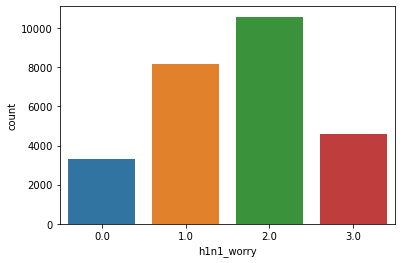

In [13]:
sns.countplot(df['h1n1_worry'])

In [14]:

df['h1n1_worry'].value_counts()

2.0    10575
1.0     8153
3.0     4591
0.0     3296
Name: h1n1_worry, dtype: int64

In [15]:
#We can just fill null values with mode
df['h1n1_worry'].isnull().sum()

92

In [16]:
modeW = df['h1n1_worry'].value_counts().idxmax()
df['h1n1_worry'].fillna(modeW, inplace = True)

In [17]:
#The more people are worried more likely is that they get the vaccine
pd.crosstab(df['h1n1_worry'], df['h1n1_vaccine'])

h1n1_vaccine,0,1
h1n1_worry,,
0.0,2849,447
1.0,6756,1397
2.0,8178,2489
3.0,3250,1341


In [18]:
df['h1n1_awareness'].unique()

array([ 0.,  2.,  1., nan])

In [19]:
df['h1n1_awareness'].isnull().sum()

116

In [20]:
modeA = df['h1n1_awareness'].value_counts().idxmax()
df['h1n1_awareness'].fillna(modeA, inplace = True)

In [21]:
#Most People with knowledge about the h1n1 get the vaccine than the the people with none 
pd.crosstab(df['h1n1_awareness'], df['h1n1_vaccine'])

h1n1_vaccine,0,1
h1n1_awareness,,
0.0,2145,361
1.0,12039,2675
2.0,6849,2638


In [22]:
df['antiviral_medication'].unique()

array([ 0.,  1., nan])

In [23]:
df['antiviral_medication'].isnull().sum()

71

In [24]:
modeAm = df['antiviral_medication'].value_counts().idxmax()
df['antiviral_medication'].fillna(modeAm, inplace = True)

In [25]:
pd.crosstab(df['antiviral_medication'], df['h1n1_vaccine'])

h1n1_vaccine,0,1
antiviral_medication,,
0.0,20103,5303
1.0,930,371


In [26]:
cols = ['contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children']
for x in cols:
    print(x + " null values = ", df[x].isnull().sum())

contact_avoidance null values =  208
bought_face_mask null values =  19
wash_hands_frequently null values =  42
avoid_large_gatherings null values =  87
reduced_outside_home_cont null values =  82
avoid_touch_face null values =  128
dr_recc_h1n1_vacc null values =  2160
dr_recc_seasonal_vacc null values =  2160
chronic_medic_condition null values =  971
cont_child_undr_6_mnths null values =  820
is_health_worker null values =  804
has_health_insur null values =  12274
is_h1n1_vacc_effective null values =  391
is_h1n1_risky null values =  388
sick_from_h1n1_vacc null values =  395
is_seas_vacc_effective null values =  462
is_seas_risky null values =  514
sick_from_seas_vacc null values =  537
age_bracket null values =  0
qualification null values =  1407
race null values =  0
sex null values =  0
income_level null values =  4423
marital_status null values =  1408
housing_status null values =  2042
employment null values =  1463
census_msa null values =  0
no_of_adults null values =  249

In [27]:
#Chose to run with if statement to check if any variable had majoriity of null values
for x in cols:
    if(df[x].isnull().sum() < 1000):
        mode = df[x].value_counts().idxmax()
        df[x].fillna(mode, inplace = True)

In [28]:
for x in cols:
    print(x + " null values = ", df[x].isnull().sum())

contact_avoidance null values =  0
bought_face_mask null values =  0
wash_hands_frequently null values =  0
avoid_large_gatherings null values =  0
reduced_outside_home_cont null values =  0
avoid_touch_face null values =  0
dr_recc_h1n1_vacc null values =  2160
dr_recc_seasonal_vacc null values =  2160
chronic_medic_condition null values =  0
cont_child_undr_6_mnths null values =  0
is_health_worker null values =  0
has_health_insur null values =  12274
is_h1n1_vacc_effective null values =  0
is_h1n1_risky null values =  0
sick_from_h1n1_vacc null values =  0
is_seas_vacc_effective null values =  0
is_seas_risky null values =  0
sick_from_seas_vacc null values =  0
age_bracket null values =  0
qualification null values =  1407
race null values =  0
sex null values =  0
income_level null values =  4423
marital_status null values =  1408
housing_status null values =  2042
employment null values =  1463
census_msa null values =  0
no_of_adults null values =  0
no_of_children null values 

In [29]:
#Had arond 50% of the total entries as null
del df['has_health_insur']

In [30]:
#Replacing remaining columns
cols = ['dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc', 'qualification', 'income_level', 'marital_status', 'housing_status', 'employment']
for x in cols:
    mode = df[x].value_counts().idxmax()
    df[x].fillna(mode, inplace = True)

In [31]:
#Checking to see if any column is left or not
cols = ['contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children']
for x in cols:
    print(x + " null values = ", df[x].isnull().sum())

contact_avoidance null values =  0
bought_face_mask null values =  0
wash_hands_frequently null values =  0
avoid_large_gatherings null values =  0
reduced_outside_home_cont null values =  0
avoid_touch_face null values =  0
dr_recc_h1n1_vacc null values =  0
dr_recc_seasonal_vacc null values =  0
chronic_medic_condition null values =  0
cont_child_undr_6_mnths null values =  0
is_health_worker null values =  0
is_h1n1_vacc_effective null values =  0
is_h1n1_risky null values =  0
sick_from_h1n1_vacc null values =  0
is_seas_vacc_effective null values =  0
is_seas_risky null values =  0
sick_from_seas_vacc null values =  0
age_bracket null values =  0
qualification null values =  0
race null values =  0
sex null values =  0
income_level null values =  0
marital_status null values =  0
housing_status null values =  0
employment null values =  0
census_msa null values =  0
no_of_adults null values =  0
no_of_children null values =  0


In [32]:
df.columns

Index(['h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'is_h1n1_vacc_effective', 'is_h1n1_risky',
       'sick_from_h1n1_vacc', 'is_seas_vacc_effective', 'is_seas_risky',
       'sick_from_seas_vacc', 'age_bracket', 'qualification', 'race', 'sex',
       'income_level', 'marital_status', 'housing_status', 'employment',
       'census_msa', 'no_of_adults', 'no_of_children', 'h1n1_vaccine'],
      dtype='object')

In [33]:
cols = ['h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'is_h1n1_vacc_effective', 'is_h1n1_risky',
       'sick_from_h1n1_vacc', 'is_seas_vacc_effective', 'is_seas_risky',
       'sick_from_seas_vacc', 'age_bracket', 'qualification', 'race', 'sex',
       'income_level', 'marital_status', 'housing_status', 'employment',
       'census_msa', 'no_of_adults', 'no_of_children']
for x in cols:
    print(pd.crosstab(df[x], df['h1n1_vaccine'], margins = all))
    print(  )



h1n1_vaccine      0     1    All
h1n1_worry                      
0.0            2849   447   3296
1.0            6756  1397   8153
2.0            8178  2489  10667
3.0            3250  1341   4591
All           21033  5674  26707

h1n1_vaccine        0     1    All
h1n1_awareness                    
0.0              2145   361   2506
1.0             12039  2675  14714
2.0              6849  2638   9487
All             21033  5674  26707

h1n1_vaccine              0     1    All
antiviral_medication                    
0.0                   20103  5303  25406
1.0                     930   371   1301
All                   21033  5674  26707

h1n1_vaccine           0     1    All
contact_avoidance                    
0.0                 5954  1317   7271
1.0                15079  4357  19436
All                21033  5674  26707

h1n1_vaccine          0     1    All
bought_face_mask                    
0.0               19778  5088  24866
1.0                1255   586   1841
All         

In [34]:
#Good Predictors = ['h1n1_worry', 'h1n1_awareness', 'contact_avoidance', 'avoid_large_gatherings', 'reduced_outside_home_cont',
#'avoid_touch_face', 'dr_recc_seasonal_vacc', 'chronic_medic_condition', 'is_h1n1_vacc_effective', 'is_h1n1_risky', 
#'sick_from_h1n1_vacc', 'is_seas_vacc_effective', 'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification', 'sex',
#'income_level', 'census_msa', 'no_of_adults', 'no_of_children']

In [35]:
#To see which variable needs encoding and what type of encoding
cols = ['h1n1_worry', 'h1n1_awareness', 'contact_avoidance', 'avoid_large_gatherings', 'reduced_outside_home_cont',
'avoid_touch_face', 'dr_recc_seasonal_vacc', 'chronic_medic_condition', 'is_h1n1_vacc_effective', 'is_h1n1_risky', 
'sick_from_h1n1_vacc', 'is_seas_vacc_effective', 'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification', 'sex',
'income_level', 'census_msa', 'no_of_adults', 'no_of_children']
for x in cols:
    print(x + " unique_values =", df[x].unique())

h1n1_worry unique_values = [1. 3. 2. 0.]
h1n1_awareness unique_values = [0. 2. 1.]
contact_avoidance unique_values = [0. 1.]
avoid_large_gatherings unique_values = [0. 1.]
reduced_outside_home_cont unique_values = [1. 0.]
avoid_touch_face unique_values = [1. 0.]
dr_recc_seasonal_vacc unique_values = [0. 1.]
chronic_medic_condition unique_values = [0. 1.]
is_h1n1_vacc_effective unique_values = [3. 5. 4. 2. 1.]
is_h1n1_risky unique_values = [1. 4. 3. 2. 5.]
sick_from_h1n1_vacc unique_values = [2. 4. 1. 5. 3.]
is_seas_vacc_effective unique_values = [2. 4. 5. 3. 1.]
is_seas_risky unique_values = [1. 2. 4. 3. 5.]
sick_from_seas_vacc unique_values = [2. 4. 1. 5. 3.]
age_bracket unique_values = ['55 - 64 Years' '35 - 44 Years' '18 - 34 Years' '65+ Years'
 '45 - 54 Years']
qualification unique_values = ['< 12 Years' '12 Years' 'College Graduate' 'Some College']
sex unique_values = ['Female' 'Male']
income_level unique_values = ['Below Poverty' '<= $75,000, Above Poverty' '> $75,000']
census_ms

In [36]:
X = df.loc[:,['h1n1_worry', 'h1n1_awareness', 'contact_avoidance', 'avoid_large_gatherings', 'reduced_outside_home_cont',
'avoid_touch_face', 'dr_recc_seasonal_vacc', 'chronic_medic_condition', 'is_h1n1_vacc_effective', 'is_h1n1_risky', 
'sick_from_h1n1_vacc', 'is_seas_vacc_effective', 'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification', 'sex',
'income_level', 'census_msa', 'no_of_adults', 'no_of_children']]

In [37]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 26707 non-null  float64
 1   h1n1_awareness             26707 non-null  float64
 2   contact_avoidance          26707 non-null  float64
 3   avoid_large_gatherings     26707 non-null  float64
 4   reduced_outside_home_cont  26707 non-null  float64
 5   avoid_touch_face           26707 non-null  float64
 6   dr_recc_seasonal_vacc      26707 non-null  float64
 7   chronic_medic_condition    26707 non-null  float64
 8   is_h1n1_vacc_effective     26707 non-null  float64
 9   is_h1n1_risky              26707 non-null  float64
 10  sick_from_h1n1_vacc        26707 non-null  float64
 11  is_seas_vacc_effective     26707 non-null  float64
 12  is_seas_risky              26707 non-null  float64
 13  sick_from_seas_vacc        26707 non-null  flo

In [38]:
y = df.iloc[:,-1]

In [39]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [40]:
X['sex'] = LabelEncoder().fit_transform(X['sex'])

In [41]:
ct = ColumnTransformer([('encoder', OneHotEncoder(), [14,15,17,18])], remainder = 'passthrough')

In [42]:
X = pd.DataFrame(ct.fit_transform(X))

In [43]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       26707 non-null  float64
 1   1       26707 non-null  float64
 2   2       26707 non-null  float64
 3   3       26707 non-null  float64
 4   4       26707 non-null  float64
 5   5       26707 non-null  float64
 6   6       26707 non-null  float64
 7   7       26707 non-null  float64
 8   8       26707 non-null  float64
 9   9       26707 non-null  float64
 10  10      26707 non-null  float64
 11  11      26707 non-null  float64
 12  12      26707 non-null  float64
 13  13      26707 non-null  float64
 14  14      26707 non-null  float64
 15  15      26707 non-null  float64
 16  16      26707 non-null  float64
 17  17      26707 non-null  float64
 18  18      26707 non-null  float64
 19  19      26707 non-null  float64
 20  20      26707 non-null  float64
 21  21      26707 non-null  float64
 22

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [46]:
calc_vif(X)

D:\Python\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,0,inf
1,1,inf
2,2,inf
3,3,inf
4,4,inf
5,5,inf
6,6,inf
7,7,inf
8,8,inf
9,9,inf


In [89]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 2)

In [91]:
regr = LogisticRegression()

In [102]:
regr.fit(X_train, y_train)

D:\Python\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [103]:
y_pred = regr.predict(X_test)

In [104]:
from sklearn import metrics

<AxesSubplot:>

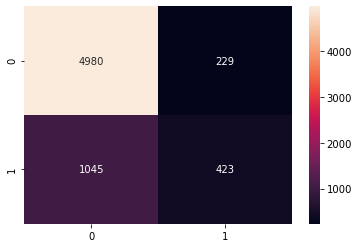

In [105]:
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot = True, fmt = 'd')

In [106]:
print("Accuracy =", metrics.accuracy_score(y_test, y_pred))
print("ROC_AUC_score =", metrics.roc_auc_score(y_test, y_pred))

Accuracy = 0.8091957465927812
ROC_AUC_score = 0.622092383074149
